# Image Dimensionality Reduction & Clustering

# Introduction


```
In this project you'll work on visualizing image data, reducing its dimensionality and clustering it.
```

```
You may not use any functions from machine learning library in your code, however you may use statistical functions.  For example, if available you __MAY NOT__ use functions like:

- pca
- k-nearest neighbors functions
```

Unless explicitly told to do so.  

But you __MAY__ use basic statistical functions like:
- std
- mean
- cov
- eig
- svd

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# DataSets

Labeled Faces in the Wild Dataset. This  dataset  consists  of  celebrities  download from the Internet from the early 2000s.  We use the grayscale version from sklearn.datasets. We will download the images in a specific way as shown below.  You will have 3,023 images, each 87x65 pixels large, belonging to 62 different people.

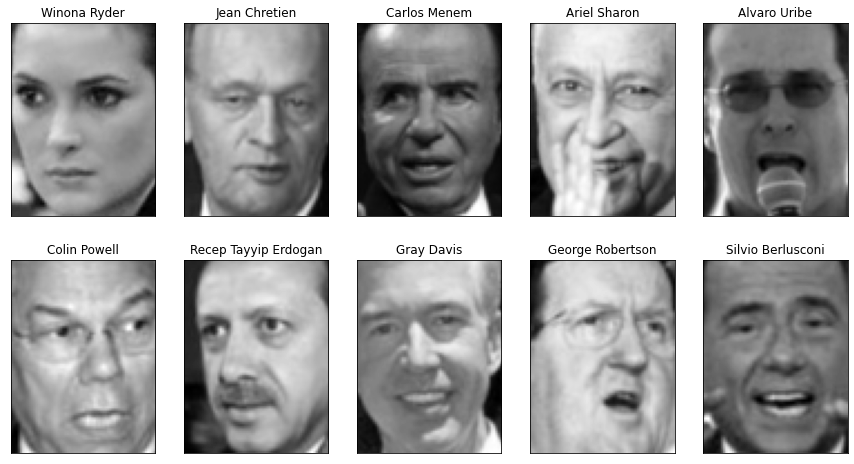

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

# Part 1: Theory Questions

## 1.1 Consider the following data:

In [ ]:
x1 = [-2., -5., -3., 0., -8., -2., 1., 5., -1., 6.]
x2 = [1., -4., 1., 3., 11., 5., 0, -1., -3., 1.]
theory_data1 = pd.DataFrame({
    'x1': x1,
    'x2': x2
})
theory_data1

,x1,x2
0,-2.0,1.0
1,-5.0,-4.0
2,-3.0,1.0
3,0.0,3.0
4,-8.0,11.0
5,-2.0,5.0
6,1.0,0.0
7,5.0,-1.0
8,-1.0,-3.0
9,6.0,1.0


a. Find the principle components of the data (you must show the math, including how you compute the eivenvectors and eigenvalues).  Make sure you standardize the data first and that your principle components are normalized to be unit length.  As for the amount of detail needed in your work imagine that you were working on paper with a basic calculator.  Show me whatever you would be writing on that paper.  (5pts)

```text
Unless explicitly told to do so. But you MAY use basic statistical functions like:
• std
• mean
• cov
• eig
• svd
```

In [ ]:
theory_data1.shape[1]

2

In [ ]:
from scipy import linalg as LA

def pca_dim_reduction(X,n):
    """
        *X - our array data
        *n - desired dimension X is to be reduced to.
    """
    print("\nORIGINAL DATA\n")
    print(X)
    print("\n")

    # Standardize the data with mean
    theory_data_mean = X.mean(axis=0)
    theory_data_centered = X - theory_data_mean
    print("\nSTANDARDIZING OUR DATA BY MEAN\n")
    print(theory_data_centered)
    print("\n")
    # calculate the covariance matrix
    cov_mat = np.cov(theory_data_centered, rowvar=False)
    print("\nCOVARIANCE MATRIX OF OUR DATA\n")
    print(cov_mat)
    print("\n")
    # calculate eigenvectors & eigenvalues of the covariance matrix
    evals_, evecs_ = LA.eig(cov_mat)

    # printing eigen values
    print("Eigen values of theory_data1:\n",evals_)
    print("\n")
    # printing eigen vectors
    print("Eigenvectors of theory_data1:\n",evecs_)

    print("\n")
    print("\t-------- Part 1.b Project the data onto the principal component corresponding to the largest eigenvalue found in the previous part (3pts) ---------\n")
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals_)[::-1]
    evecs = evecs_[:,idx]
    # # sort eigenvectors according to same index
    evals = evals_[idx]
    # # select the first n eigenvectors (n is desired dimension
    # # of rescaled data array, or dims_rescaled_data)
    if n <= X.shape[1]:
        evecs = evecs_[:, :n]
        # # carry out the transformation on the data using eigenvectors
        # #print the re-scaled data, eigenvalues, and eigenvectors
        print("\n ----------- re-scaled data to one dimension, eigenvalues, and eigenvectors\n")
        # Dot product of two arrays:
        #   > theory data and largest eigenvalue
        pca = np.dot(evecs.T, theory_data_centered.T).T
        print("\nReduced PCA 1dimension\n")
        print(pca)
        print("\n")
        print("Our New Eigen Values and Vectors\n")
        print(evals, evecs)
        # return pca

    else:
        print(f"\n ----------------- Error You reduction dimension {n} is greater than current data dimension {X.shape[1]} --------------------")
        print(f"ReRun the function with a lesser dimension {X.shape[1]}<n>o")

In [ ]:
pca_dim_reduction(theory_data1,1)


ORIGINAL DATA

    x1    x2
0 -2.0   1.0
1 -5.0  -4.0
2 -3.0   1.0
3  0.0   3.0
4 -8.0  11.0
5 -2.0   5.0
6  1.0   0.0
7  5.0  -1.0
8 -1.0  -3.0
9  6.0   1.0



STANDARDIZING OUR DATA BY MEAN

    x1   x2
0 -1.1 -0.4
1 -4.1 -5.4
2 -2.1 -0.4
3  0.9  1.6
4 -7.1  9.6
5 -1.1  3.6
6  1.9 -1.4
7  5.9 -2.4
8 -0.1 -4.4
9  6.9 -0.4



COVARIANCE MATRIX OF OUR DATA

[[17.87777778 -7.37777778]
 [-7.37777778 18.26666667]]


Eigen values of theory_data1:
 [10.69188256+0.j 25.45256189+0.j]


Eigenvectors of theory_data1:
 [[-0.71636104  0.69772979]
 [-0.69772979 -0.71636104]]


	-------- Part 1.b Project the data onto the principal component corresponding to the largest eigenvalue found in the previous part (3pts) ---------


 ----------- re-scaled data to one dimension, eigenvalues, and eigenvectors


Reduced PCA 1dimension

[[ 1.06708906]
 [ 6.70482114]
 [ 1.7834501 ]
 [-1.7610926 ]
 [-1.61204264]
 [-1.72383011]
 [-0.38426426]
 [-2.55197862]
 [ 3.14164719]
 [-4.66379924]]


Our New Eigen Values a

b. Project the data onto the principal component corresponding to the largest eigenvalue found in the previous part (3pts)

## 1.2. Consider the following data

In [ ]:
x1 = [-2., -5., -3., 0., -8., -2., 1., 5., -1., 6.]
x2 = [1., -4., 1., 3., 11., 5., 0, -1., -3., 1.]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
td2 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y,
    'Count': 1
})

In [ ]:
td2

In [ ]:
td2.groupby(['y', 'x1', 'x2']).first()

(a)  Compute the information gain for each feature. You could standardize the data overall, although it won’t make a difference.  (5pts).

In [ ]:
import math
# Function to calculate information gain
def calc_ent(data,column):
    """
    Calculate entropy given a data set and target column
    """
    # Compute the counts of each unique value in the column
    counts = data.value_counts(normalize=True).values
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = -1 * np.sum(np.log2(probabilities) * probabilities)
    
    return -entropy

def calc_info_gain(data,column):
    """
        Calculate information given a data set,entropy and target column
    """
    # Calculate the original entropy
    original_entropy = calc_ent(data,column)
    print('\n====================\n')
    print(f"Entropy:{original_entropy}")
    print('\n====================\n')

   
    # Make two subsets of the data, based on the unique values
    left_split = data[(data['y'] == 0)]
    right_split = data[(data['y'] == 1)]
    
    # Loop through the splits and calculate the subset entropies
    # to_subtract = 0
    # for subset in [left_split, right_split]:
    #     # print(subset)
    #     prob = (subset.shape[0] / data.shape[0]) 
    #     to_subtract += prob * calc_ent(subset,column)
    to_subtract_1 = 0
    to_subtract_2 = 0
    prob_1 = (left_split.shape[0] / data.shape[0])
    to_subtract_1 += prob_1 * calc_ent(left_split,column) 
    prob_2 = (right_split.shape[0] / data.shape[0])
    to_subtract_2 += prob_2 * calc_ent(right_split,column) 
    print('\n====================\n')
    print(f"INFORMATION GAIN FOR FEATURES 0: {original_entropy - to_subtract_1}")
    print('====================\n')
    print(f"INFORMATION GAIN FOR FEATURES 1: {original_entropy - to_subtract_2}")
    print('====================\n')

    
    # Return information gain
    # i_g = original_entropy - to_subtract
    # print('\n====================\n')
    # print(f"INFORMATION GAIN: {i_g}")
    # print('====================\n')
    # return i_g

In [ ]:
calc_info_gain(td2,'y')

(b)  Which feature is more discriminating based on results in part a (1pt)?

In [ ]:
# None of the features is discriminative as both features display the same information gain.

(c)  Using LDA, find the direction of projection (you must show the math, however for this one you don’t have to show the computation for finding the eigenvalues and eigenvectors). Normalize this vector to be unit length (5pts).

In [ ]:
td2

In [ ]:
# norm1 = td2[(td2['y'] == 1)] / np.linalg.norm(td2[(td2['y'] == 1)])
# print(norm1)
# Unit length

In [ ]:
def calc_LDA(data_,column):
    print("\n Our initial Data: ")
    print('====================\n')
    print(data_)
    print('\n====================\n')
    # Standardize the data with mean
    # data__ = data_.mean(axis=0)
    # td2[(td2['y'] == 1)] / np.linalg.norm(td2[(td2['y'] == 1)])
    # data = data_ - data__
    data = data_ / np.linalg.norm(data_)
    print("\n New data")
    print('====================\n')
    print(data)
    print('\n====================\n')
    # get classes we want from column 
    # in our case its 0 ,1
    print("\n Our target classes\n")
    target_classes = np.unique(data[column].values)
    print(target_classes) 
    print('\n====================\n')
    # Get mean vectors from each target class
    mean_vectors = []
    # print(data[(data[column] == 0)])
    for i in target_classes:
        # print(i)
        mean_vectors.append(np.mean( data[(data[column] == i)].values, axis=0))
    print("Our mean vectors\n")
    print(mean_vectors)
    print('\n====================\n')

    # Calulating B matrix
    mu1_mu2 = (mean_vectors[0] - mean_vectors[1]).reshape(1, data.shape[1])
    B = np.dot(mu1_mu2.T, mu1_mu2)
    print(B)

    print('\n====================\n')    # calculate eigenvectors & eigenvalues of the covariance matrix
    evals_, evecs_ = LA.eig(B)

    W = evecs_[:, :2] # Take 2 eigen vectors
    transformed = B.dot(W)
    print('====================\n')
    print('direction of projection')
    print(transformed)

calc_LDA(td2,'y')

(d)  Project the data onto the principal component found in the previous part (3pts).

In [ ]:
pca_prev = np.array([[ 1.06708906],[ 6.70482114],[ 1.7834501 ],[-1.7610926 ],[-1.61204264],[-1.72383011],[-0.38426426],[-2.55197862],[ 3.14164719],[-4.66379924]])
# print(pca_prev.T)
print("\n")
current_data = td2[['x1','x2']].values
# print(current_data.shape)
print("Project the data onto the principal component found in the previous part")
final =  current_data.T * pca_prev.T 

print("\nClass 0")
print(final[0])
print("\n")
print("\nClass 1")
print(final[1])


(e)  Does the projection you performed in the previous part seem to provide good class separation?  Why or why not (1pt)?

In [ ]:
# there is good class separation in the final result as it divided each class into 10 values each.

---
---
# Part 2: Dimensionality Reduction via PCA

Import the data as shown above.  This the labeled faces in the wild dataset.
Verify that you have the correct number of people and classes 






In [ ]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


This dataset is skewed toward George W. Bush and Colin Powell as you can verify here:


In [ ]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush): 

In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


We are now going to compute how well a KNN classifier does using just the pixels alone.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.10f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.2325581395


In [ ]:
X_train.shape

(1547, 5655)

You should have an accuracy around 23\% - 27\%.

**Once you have your setup complete, write a script to do the following:**


1.  Write your own version of KNN (k=1) where you use the SSD (sum of squared differences) to compute similarity

2.  Verify that your KNN has a similar accuracy as sklearn’s version

3.  Standardize your data (zero mean, divide by standard deviation)

4.  Reduces the data to 100D using PCA

5.  Compute the KNN again where K=1 with the 100D data.  Report the accuracy

6.  Compute the KNN again where K=1 with the 100D Whitened data.  Report the accuracy

7.  Reduces the data to 2D using PCA

8.  Graphs the data for visualization

Recall that although you may not use any package ML functions like _pca_, you may use statistical functions like _eig_ or _svd_.

Your graph should end up looking similar to Figure 1 _refer to the PDF for the figure_ (although it may be rotated differently, de-pending how you ordered things)

In [ ]:
from scipy.stats import mode

def ssd(p1,p2):
    """
        # SSD (sum of squared differences)
        #Euclidean Distance
    """
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 

def KNN_predict(x_train, y_train , x_input, k):
    """
        #Function to calculate KNN
        *x_train: feature datasets
        *y_train: label train dataset
        *x_input: test datasets
        *k: range of neareset neighbours
    """
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = ssd(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y_train[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [ ]:
def calculate_metric_for_model(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [ ]:
"""
# Write your own version of KNN (k=1) where you use the SSD (sum of squared differences) to compute similarity
# Verify that your KNN has a similar accuracy as sklearn’s version
"""

# Applying our function k=1
y_pred_ = KNN_predict(X_train,y_train,X_test , 1)

accuracy = calculate_metric_for_model(y_test,y_pred_)

print("--------------------- KNN IMPLIMENTATION --------------------------------")
print("Accuracy Score: ",accuracy)
print("-----------------------------------------------------\n")

--------------------- KNN IMPLIMENTATION --------------------------------
Accuracy Score:  23.25581395348837
-----------------------------------------------------



In [ ]:
"""
# Compute the KNN again where K=1 with the 100D Whitened data. Report the accuracy
"""
def whiten(x):
    # Center data
    # By subtracting mean for each feature
    x_c = x.T - np.mean(x.T, axis=0)
    xc = x_c.T
    
    # Calculate covariance matrix
    x_cov = np.cov(xc, rowvar=True, bias=True)
    
    # Calculate Eigenvalues and Eigenvectors
    w, v = np.linalg.eig(x_cov)
   
    # Create a diagonal matrix
    diagw = np.diag(1/(w**0.5)) 
    diagw = diagw.real.round(4) 
    

    # Whitening transform using PCA (Principal Component Analysis)
    wpca = np.dot(np.dot(diagw, v.T), xc)
    
    return wpca


# Applying our function k=1
X_train_white = whiten(X_train)
X_test_white = whiten(X_test)
y_pred_white = KNN_predict(X_train_white,y_train,X_test_white , 1)

accuracy = calculate_metric_for_model(y_test,y_pred_)

print("--------------------- KNN IMPLIMENTATION WHITENED DATA--------------------------------")
print("Accuracy Score: ",accuracy)
print("There seems to not be much change in the accuracy score after whitening our data.")
print("-----------------------------------------------------\n")

--------------------- KNN IMPLIMENTATION WHITENED DATA--------------------------------
Accuracy Score:  23.25581395348837
There seems to not be much change in the accuracy score after whitening our data.
-----------------------------------------------------



In [ ]:
U, Sigma, VT = np.linalg.svd(X_people, full_matrices=False)


# dimensions
print("X:", X_people.shape)
print("U:", U.shape)
print("Sigma:", Sigma.shape)
print("V^T:", VT.shape)

X: (2063, 5655)
U: (2063, 2063)
Sigma: (2063,)
V^T: (2063, 5655)


In [ ]:
num_components = 100 # Number of principal components
PCA_100D = np.matmul(X_people, VT[:num_components,:].T)

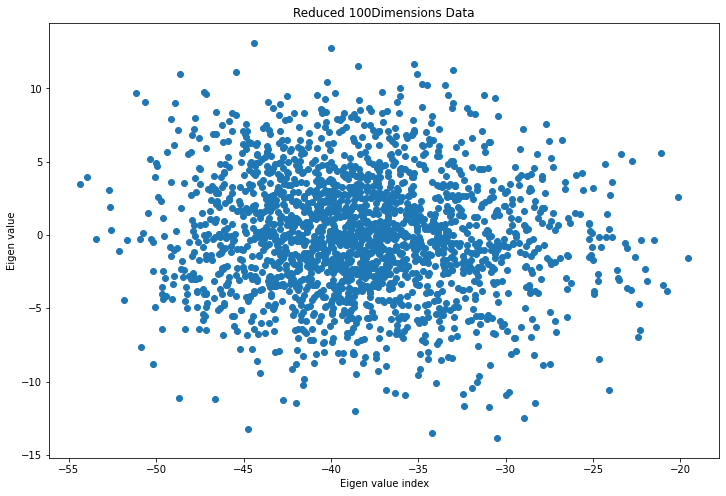

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Reduced 100Dimensions Data")
plt.scatter(x=PCA_100D[:,0],y=PCA_100D[:,1])
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [ ]:
"""
# Reduces the data to 100D using PCA

# Compute the KNN again where K=1 with the 100D data. Report the accuracy
"""
# split the data into training and test sets
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(PCA_100D, y_people, stratify=y_people, random_state=0)

# Applying our function k=1
r_y_pred_ = KNN_predict(r_X_train,r_y_train,r_X_test , 1)

accuracy_2 = calculate_metric_for_model(y_test,r_y_pred_)

print("--------------------- KNN IMPLIMENTATION WITH REDUCED DIMENSIONS --------------------------------")
print("Accuracy Score: ",accuracy_2)
print("Our accuracy score seems to have dropped as we reduce our dimensions")
print("-----------------------------------------------------\n")


--------------------- KNN IMPLIMENTATION WITH REDUCED DIMENSIONS --------------------------------
Accuracy Score:  23.643410852713178
Our accuracy score seems to have dropped as we reduce our dimensions
-----------------------------------------------------



In [ ]:
"""
# Reduces the data to 2D using PCA

# Graphs the data for visualization
"""
num_components = 2 # Number of principal components
X_people_2D =  np.matmul(X_people, VT[:num_components,:].T)

In [ ]:
X_people_2D.shape

(2063, 2)

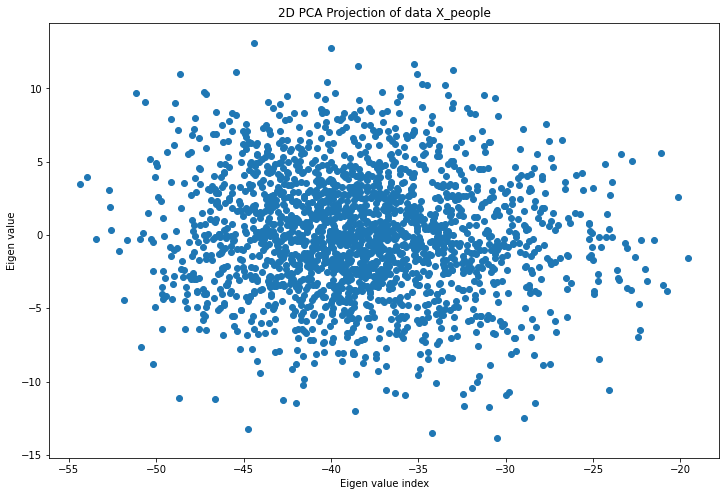

In [ ]:
plt.figure(figsize=(12,8))
plt.title("2D PCA Projection of data X_people")
plt.scatter(x=X_people_2D[:,0],y=X_people_2D[:,1])
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

---
---
# Part 3: Eigenfaces



Import the data as shown above.  This the labeled faces in the wild dataset.Use the Xtrain data from above.  Let’s analyze the first and second principal components.

**Write a script that:**

1.  Imports the data as mentioned above.
2.  Standardizes the data.
3.  Performs PCA on the data (again, although you may not use any package ML functions like pca, you may use statistical functions like eig).  No need to whiten here.
4.  Find the max and min image on PC1’s axis.  Find the max and min of PC2.  Plot and report which faces these points correspond to, what variation do these components capture?
5.  Visualizes the most important principle component as a 87x65 image (see Figure 2).
6.  Reconstructs the Xtrain[0,:] image using the primary principle component. To best see the full reconstruction, “unstandardize” the reconstruction by multiplying it by the original standard deviation and adding back in the original mean.
7.  Determines the number of principle components necessary to encode at least 95% of the information, k.
8.  Reconstructs theXtrain[0,:]image using the k most significant eigen-vectors (found in theprevious  step,  see  Figure  4). For the fun of it maybe even look to see if you can perfectly reconstruct the face if you use all the eigen-vectors!  Again, to best see the full re-construction,“unstandardize” the reconstruction by multiplying it by the original standard deviation andadding back in the original mean.

Your principle eigenface should end up looking similar to Figure 2 of the PDF.

Your principal reconstruction should end up looking similar to Figure 3 of the PDF.

Your 95% reconstruction should end up looking similar to Figure 4 of the PDF.

In [ ]:
#
def center_function(X):
    """
        #Standardize our data.

    """
    # calcualte the mean of each column   
    m = np.mean(X, axis = 0) 
    
    # Substract the mean from X
    X = X - m
    
    # calcualte the standard deviation of each column std
    std = np.std(X, axis = 0)  
    
    # handle zero standard deviation
    std_filled = std.copy()
    std_filled[std == 0] = 1.0
    
    # calculate standardized X 
    X_ = (X-m) / std_filled  
    
    return X_


def cov_mat(X):
    """
        # Calclulate covariance matrix by multiplying transposed array to itself.

    """
    return X.T@X

def calc_eig_eiv(x):
    """
        # Get eigen values and vectors
        # 
    """
    vals, vecs = np.linalg.eig(x)
    i = vals.argsort()[::-1]
    vals,vecs = vals[i],vecs[:, i]
    return vals, vecs


def PCA_reduction(vecs,X,dimensions):
    """
        # Return reduces dimensions of our initial data
    """
    dot_mat,vec_reduced = vecs[:, :dimensions], np.dot(X, vecs)
    return vec_reduced,dot_mat

# standardize data
X_standardized = center_function(X_people)
# get covariance matrix
covarience_matrix = cov_mat(X_standardized)
# eigen values and eigen vectors
eigen_val,eigen_vect = calc_eig_eiv(covarience_matrix)
# product of X and eigen_vecs
dot_p = np.dot(X_standardized,eigen_vect)

#2D Reduction
n_dimensions = 2

res2d_vecs,res2d_mat=PCA_reduction(eigen_vect,X_standardized,n_dimensions)

In [ ]:
data = {"PC1":res2d_mat[:,0],"PC2":res2d_mat[:,1]}
 
res2d = pd.DataFrame.from_dict(data)
# Reduced to 2 dimensions
res2d

,PC1,PC2
0,0.005613,-0.009104
1,0.005785,-0.008989
2,0.005998,-0.009259
3,0.006291,-0.009720
4,0.006658,-0.010228
...,...,...
5650,0.006145,0.010582
5651,0.005946,0.010249
5652,0.005788,0.010203
5653,0.005607,0.009892


In [ ]:
"""
# Find the max and min image on PC1’s axis. Find the max and min of PC2.
# Plot and report which faces these points correspond to, what variation do these components capture?

"""
min_pc1 , max_pc1 = float(res2d['PC1'].min()),float(res2d['PC1'].max())
min_pc2 , max_pc2 = float(res2d['PC2'].min()),float(res2d['PC2'].max())


print(f"PC1 MIN: {min_pc1} MAX: {max_pc1}\n")
print(f"PC2 MIN: {min_pc2} MAX: {max_pc2}\n")


PC1 MIN: 0.004870501812547445 MAX: 0.02179528772830963

PC2 MIN: -0.023380639031529427 MAX: 0.020747045055031776



In [ ]:
res2d.values.shape

(5655, 2)

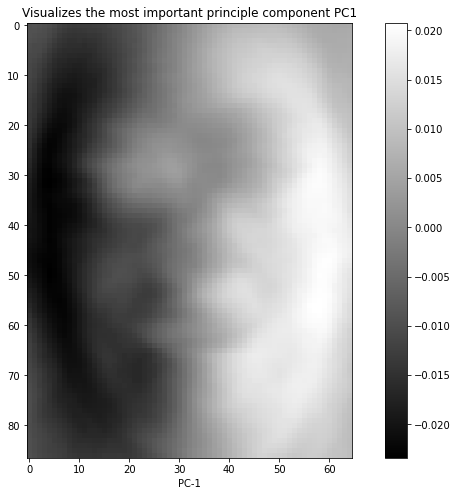

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Visualizes the most important principle component PC1")
plt.imshow(np.reshape(res2d.values[:,-1], (87,65)),cmap=cm.gray)
plt.colorbar()
plt.xlabel('PC-1')
plt.show()

In [ ]:
"""
Reconstructs the Xtrain[0,:] image using the primary principle component. 
To best see the full reconstruction, 
“unstandardize” the reconstruction by multiplying it by the original standard deviation and adding back in the original mean.
# calculating loss and reconstructing images
# 
"""
mean = np.mean(X_train, axis=0)
scale = np.std(X_train, axis=0, ddof=1)

# “unstandardize”
X_unstandardized = X_standardized * scale + mean
unstandardized_matrix = cov_mat(X_unstandardized)

unstandardized_vals,unstandardized_vecs = calc_eig_eiv(unstandardized_matrix)

unstandardized_dot_product = np.dot(X_unstandardized,unstandardized_vecs)

#2D Reduction
n_dim = 2
unstandardized_vec2d, unstandardized_res2d = PCA_reduction(unstandardized_vecs,X_unstandardized,n_dim)

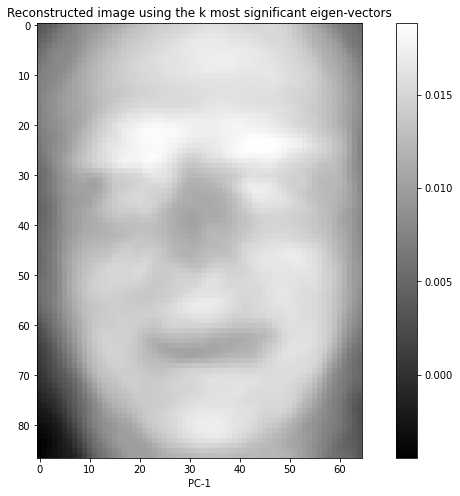

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Reconstructed image using the k most significant eigen-vectors")
plt.imshow(np.reshape(unstandardized_res2d[:,0], (87,65)),cmap=cm.gray)
plt.colorbar()
plt.xlabel('PC-1')
plt.show()

In [ ]:
X_people.shape

(2063, 5655)

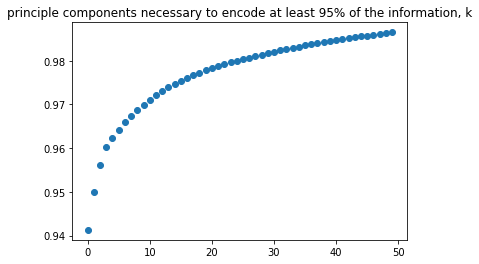

In [ ]:
"""
# Determines the number of principle components necessary to encode at least 95% of the information, k

"""

# standardize data
X_s = center_function(X_people)
# get covariance matrix
covarience_matrix_ = cov_mat(X_s)
# eigen values and eigen vectors
eigen_val,eigen_vect = calc_eig_eiv(covarience_matrix_)
# product of X and eigen_vecs
dot_p = np.dot(X_standardized,eigen_vect)

#2D Reduction
n_dimensions = 2063
vecs,mat=PCA_reduction(eigen_vect,X_s,n_dimensions)
def get_eigen_value_distribution(eigenvectors):
    return np.cumsum(eigenvectors) / np.sum(eigenvectors)

def plot_eigen_value_distribution(eigenvectors, interval):
    plt.scatter(interval, get_eigen_value_distribution(eigenvectors)[interval])

plot_eigen_value_distribution(eigen_val, range(0, 50))
plt.title("principle components necessary to encode at least 95% of the information, k".format(34))
plt.show()

>the number of principle components necessary to encode at least 95% of the information, k would be about 20

---
---
# Part 4: Clustering

Let’s implement our own version of k-means to cluster data! Once you have your setup complete as shown above , write a script to do the following:
1.  Write  your  own  version  of  K-means  clustering  where  you  use  the  L2  distance  to  compute similarity
2.  Standardize your data (zero mean, divide by standard deviation)
3.  Reduces the data to 100D using PCA.
4.  Run K-means clustering with K = 10.
5.  Report the number of images within each cluster.
6.  Reconstruct the cluster centers for each of the K clusters.  You will have to rotate the cluster centers back to the original space to visualize.  Report these images.
7.  Find the image closest to the cluster center, and furthest from the cluster center and report these images.  Again, you will have to rotate the images centers back to the original space to visualize.

__Implementation Details__
1.  Seed your random number generator with zero (do this right before running your k-means).
2.  Randomly select k observations and use them for the initial reference vectors.  I suggest you use randomize the indices and use the first k randomized indices to select the observations.
3.  Use the L2 distance (Euclidean) to measure the distance between observations and reference vectors.
4.  Terminate the training process when the sum of magnitude of change of the cluster centers (from the previous iteration to the current one) is less than $\epsilon=2^{-23}$.  That is, when $\sum_{i=1}^k d(a_i(t-1),a_i(t))<\epsilon$ where $k$ is the number of clusters, $a_i(t)$ is the reference vector for cluster $i$ at time $t$ and $d(x,y)$ is the L1 distance (Manhattan) between vectors $x$ and $y$ (as defined in the _Similarity and Distance Functions_ link on BBlearn), or when you've hit 10,000 iterations.

In [ ]:
"""
# Standardize your data (zero mean, divide by standard deviation)
# Reduces the data to 100D using PCA.
"""
# standardize data
X_s_ = center_function(X_people)
# get covariance matrix
covarience_matrix__ = cov_mat(X_s_)
# eigen values and eigen vectors
eigen_val,eigen_vect = calc_eig_eiv(covarience_matrix__)
# product of X and eigen_vecs
dot_p = np.dot(X_standardized,eigen_vect)

#2D Reduction
n_dimensions = 100
vecs,res100D_mat = PCA_reduction(eigen_vect,X_s_,n_dimensions)

In [ ]:
import plotly.express as px
plt.style.use('dark_background')

class KMC:
    def __init__(self, X, num_clusters):
        self.X = X
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        
    # randomly initialize centroids
    def initialize_random_centroids(self):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = self.X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self):
        centroids = self.initialize_random_centroids() # row , column full with zero 
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(self.X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self):
        cluster = self.create_cluster()
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(self.X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self):
        clusters = self.create_cluster()
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    def plot_fig(self,y):
        fig = px.scatter(self.X[:, 0], self.X[:, 1], color=y)
        fig.show() # visualize

    def euclidean(self,p1, p2):
        """
            Return euclidean distances between a point & a dataset
        """
        dist = np.sqrt(np.sum((p1-p2)**2))
        return dist

    def evaluate(self):
        centroids = self.initialize_random_centroids() # initialize random centroids
        centroids = []
        centroid_idxs = []
        for x in self.X:
            dists = self.euclidean(x, centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs

    # fit data
    def fit(self):
        centroids = self.initialize_random_centroids() # initialize random centroids
        for item in self.X: 
            #Array to store distances
            point_dist = []
            #Loop through each training Data
            for j in range(len(self.X)): 
                distances = self.euclidean(np.array(self.X[j,:]) , item) 
                #Calculating the distance
                point_dist.append(distances) 
            point_dist = np.array(point_dist) 

        for _ in range(self.max_iterations):
            clusters = self.create_cluster() # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids() # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        y_pred = self.predict_cluster() # predict function

        if self.plot_figure: # if true
            self.plot_fig(y_pred) # plot function 

            
        return y_pred

In [ ]:
"""
    # Write your own version of K-means clustering where you use the L2 distance to compute similarity
    # Standardize your data (zero mean, divide by standard deviation)
    # Reduces the data to 100D using PCA.
    # Run K-means clustering with K = 10

"""

np.random.seed(10)
num_clusters = 10 # num of cluster
Kmeans = KMC(res100D_mat, num_clusters)
kmeans_y_pred = Kmeans.fit()

In [ ]:
clstr = Kmeans.calculate_new_centroids()
clstr.shape

(10, 100)

In [ ]:
centroids = Kmeans.calculate_new_centroids()
centroids.shape

(10, 100)

In [ ]:
for i, e in enumerate(clstr):
    print(f'cluster{i + 1}: {len(e)}')

cluster1: 100
cluster2: 100
cluster3: 100
cluster4: 100
cluster5: 100
cluster6: 100
cluster7: 100
cluster8: 100
cluster9: 100
cluster10: 100


In [ ]:
array__ = np.resize(clstr.T[0],(87, 65))

<Figure size 432x288 with 0 Axes>

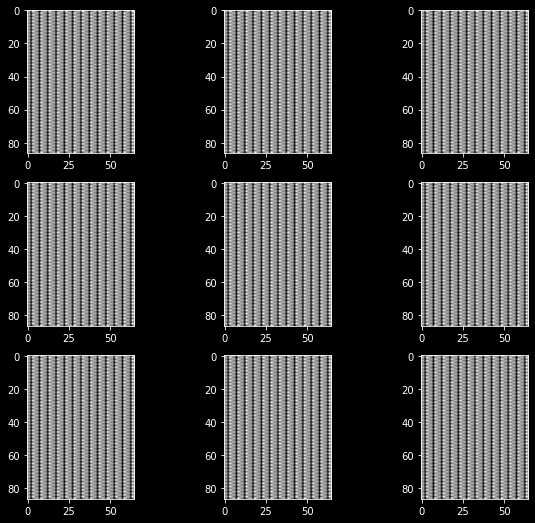

In [ ]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(array__, interpolation='bilinear')